<a href="https://colab.research.google.com/github/danielicapui/reg-covid/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd 
import numpy as np
import sklearn.metrics.pairwise as pw
from sklearn import preprocessing
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.optimize import leastsq
import pylab as plt
from PIL import Image
from scipy.optimize import curve_fit
import requests
from io import BytesIO

In [ ]:
link="https://raw.githubusercontent.com/moraisnetocc/reg-covid/master/natal2.csv"
link="https://raw.githubusercontent.com/danielicapui/reg-covid/master/c1/"
#covid_casos=pd.read_csv(link,index_col=[], na_values=['(NA)']).fillna(0)
#covid_casos.columns=["date","cases"]
#data=pd.DataFrame(pd.to_numeric(covid_casos['cases'].astype('float'), errors='coerce'), covid_casos['date'])
#data


#Carregando as imagens

In [ ]:
import requests
from io import BytesIO
def rgb2gray(rgb):
  return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

def open_image(response, size):
  image=Image.open(response)
  image = image.resize((size, size), Image.ANTIALIAS)
  return rgb2gray(np.array(image.convert('RGB')))  # .tolist()

def create_image_data_set(N, size,filepath=None):
  filepath = filepath or "https://raw.githubusercontent.com/moraisnetocc/reg-covid/master/suspeitos/"
  imagesX = []
  for i in range(1, N + 1):
      response = requests.get(f'{filepath}{i}.png',stream=True).raw
      #img = Image.open(BytesIO(response.content))
      img=open_image(response,size)
      imagesX.append(img)
  print('Imagens carregadas')
  return imagesX
def fit_sin(x,y):
  x=np.array(x,dtype='float64')
  y=np.array(y,dtype='float64')
  try:
    popt, _ = curve_fit(sin_func, x, y,maxfev=100000)
  except RuntimeError:
    print("Ocorreu um erro observe os valroes de x e y")
    print("Valor de x:",x)
    print("Valor de y:",y)
    print("-"*100)
    popt, _ = curve_fit(sin_func, x, x,maxfev=100000)
  a,b,c=popt
  #plt.scatter(x, y)
  x_line =np.arange(min(x), max(x), 1)
  y_line = sin_func(x_line, a, b, c)
  #plt.plot(x_line, y_line, '--', color='blue')
  #plt.show()
  return a,b,c
def predict_x(images, size, N):
  image_predicted = [[0 for j in range(size)] for i in range(size)]
  for i in range(size):
      for j in range(size):
          line = []
          for k in range(N):
              line.append(images[k][i][j])
          x_train = line[:N-2]
          y_train = line[1:N-1]
          a,b,c=fit_sin(x_train, y_train)
          x=line[N-1]
          image=sin_func(x,a,b,c)
          image_predicted[i][j] =image
  return np.asarray(image_predicted)

In [ ]:
class SinRegression:
  def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.formula =None
        self.X = None
        self.y = None
  def prever(self,x):
    return list(map(self.formula,x))
  def distribuicao(self,X,y):
    plt.plot(X,y,"bo",label="principal")
  def fit(self, X, y):
        X = np.array(X,dtype='float64')
        y = np.array(y,dtype='float64')
        self.X = X
        self.y = y
        #self.distribuicao(X,y)
        popt, _ = curve_fit(line_func,X, y,maxfev=100000)
        # build formula y = ax + b
        a,b=popt
        self.coef_ = np.array([b])
        self.intercept_ = np.array([a])
        self.formula= lambda _x:(a*_x)+b
  def sin_fit(self, X, y):
        X = np.array(X,dtype='float64')
        y = np.array(y,dtype='float64')
        self.X = X
        self.y = y
        #self.distribuica(X,y)
        popt, _ = curve_fit(sin_func,X, y)
        print(popt)
        # build formula y = a*bxx+c
        a,b,c=popt
        amplitude=(max(X)-min(X))/2
        B=(max(X)+min(X))/2
        self.X=np.arange(min(x), max(x), 1)
        self.y= sin_func(self.X, a, b, c)
        self.coef_ = np.array([b])
        self.intercept_ = np.array([a])
        self.formula = lambda _x:  a*np.sin(b*_x*_x)+c
  def exp_fit(self,X,y):
    X = np.array(X,dtype='float64')
    y = np.array(y,dtype='float64')
    self.X = X
    self.y = y
    popt, _ = curve_fit(exp_func,X, y)
    # build formula y = a*np.exp(b*x)
    a,b=popt
    self.coef_ = np.array([b])
    self.intercept_ = np.array([a])
    self.formula = lambda _x:  a*np.exp(b*_x)
  def predict_x(self, images, size, N,op=1):
    image_predicted = [[0 for j in range(size)] for i in range(size)]
    for i in range(size):
      for j in range(size):
          line = []
          for k in range((N-1,4)):
              line.append(images[k][i][j])
          x_train = line[:N-2]
          y_train = line[1:N-1]
          if op==1:
            self.fit(x_train, y_train)
          elif op==2:
            self.sin_fit(x_train,y_train)
          elif op==3:
            self.exp_fit(x_train,y_train)
          imagem= self.prever([line[N-1]])[0]
          image_predicted[i][j] =imagem
    return np.asarray(image_predicted)

In [ ]:
optimize_func = lambda x:x[0]*np.sin(x[1]*x[4]+x[2]) + x[3] - data
def sin_func(x,a,b,c):
  return a*np.sin(b*x*x)+c
def line_func(x,a,b):
  return (a*x)+b
def exp_func(x,a,b):
  return a*np.exp(b*x)

In [ ]:
link="https://raw.githubusercontent.com/moraisnetocc/reg-covid/master/malaria/"
tam=9
size=120
data=create_image_data_set(tam,size,link)


Imagens carregadas


In [ ]:
data=np.array(data,dtype='float64')
data.shape

(9, 120, 120)

#Processamento

In [ ]:
def analise(images, size, N):
  image_predicted = [[0 for j in range(size)] for i in range(size)]
  for i in range(size):
    for j in range(size):
        line = []
        for k in range(N):
            line.append(images[k][i][j])
        x_train = line[:images.shape[0]-2]
        y_train = line[1:images.shape[0]-1]
        return x_train,y_train

In [ ]:
r=predict_x(data,size,tam)
r

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([[281.6953982 , 171.75072305, 171.28949387, ..., 178.24895378,
        167.59710601, 160.53007064],
       [239.00373249, 254.97447582, 254.97447582, ..., 254.97447582,
        254.14134303, 214.6170879 ],
       [249.65641381, 252.62735695, 252.9747    , ..., 252.30809999,
        250.57514659, 216.00234257],
       ...,
       [185.71187811, 247.31283431, 258.78979622, ..., 253.97460006,
        248.9751    , 225.62619829],
       [228.88040644, 217.02071987, 227.25803746, ..., 251.64151426,
        249.475098  , 238.49186928],
       [209.75383676, 201.68218128, 167.46961248, ..., 195.15639074,
        199.01877616, 192.34267455]])

In [ ]:
df=pd.DataFrame(r)

In [ ]:
df.shape

(120, 120)

In [ ]:
custom=SinRegression()
p=custom.predict_x(data,size,tam,2)

In [ ]:
for i in range(len(p)):
  for j in range(len(p[i])):   
    print(f"valor de p:{p[i][j]} valor de r:{r[i][j]}")


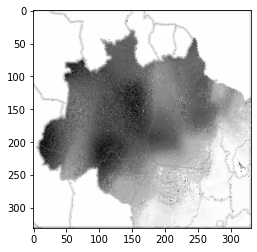

Finalizado


In [ ]:
teste = Image.fromarray(r)

#print('Mean Absolute Error:', metrics.mean_absolute_error(image_predicted, r.get_image(14)))
plt.imshow(teste)
plt.show()
print('Finalizado')

In [ ]:
s=SinRegression()
img=s.predict_x(data, size,tam,op=1)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


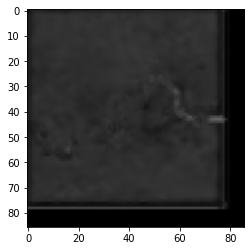

Finalizado


In [ ]:
teste2 = Image.fromarray(img)

#print('Mean Absolute Error:', metrics.mean_absolute_error(image_predicted, r.get_image(14)))
plt.imshow(teste2)
plt.show()
print('Finalizado')

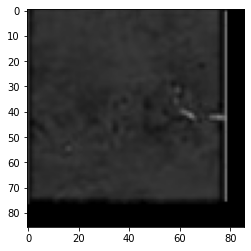

Finalizado


In [ ]:
real = Image.fromarray(data[14])

#print('Mean Absolute Error:', metrics.mean_absolute_error(image_predicted, r.get_image(14)))
plt.imshow(real)
plt.show()
print('Finalizado')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data[14],img))

Mean Absolute Error: 5.092712290105036


In [ ]:
from sklearn.metrics import r2_score
r2_score(data[14],img)

-10.06584981386399

# Definindo valores


In [ ]:
guess_mean = np.mean(data) #calculamos a media do dataset
guess_std = 3*np.std(data)/(2**(0.5))/(2**(0.5))  #calculamos o desvio padrão
guess_phase = 0 #definimos a fase
guess_freq = 1 #definimos a frequência
guess_amp = 1 #definimos a ampitude

<class 'numpy.ndarray'>


##Iremos normalizar o dataset

In [ ]:
# Isso daqui é para plotar a primeira tentativa
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean #perceba que aplicamos a #função seno no guess_phase e t
# Define a função de otimização,, nesse caso, deseja-se minimiza-se as diferenças entre
# a dataset principal  e o"guessed" parâmetros
data_first_guess.astype('float')


array([203.85602083, 263.32462947, 253.2643265 , 185.43731607,
       139.14490221, 168.51078523, 239.20125644, 268.56713945,
       222.27472559, 154.44771517, 144.38741219, 203.85602083])

In [ ]:
# do modulo scrpy.leastsq aplicamos essa #função com esses parâmetros
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
est_amp, est_freq, est_phase, est_mean

In [ ]:
 #multiplicação da aplitude pelo seno(frequencia e #fase)) + media
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
#transforma é  array espaço
fine_t = np.arange(0,max(t),0.1)
#mesma coisa só que mais precisa
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

In [ ]:
#plota os dados
plt.plot(t, data, '.')
#defini a plotagem do primeira tentativa
plt.plot(t, data_first_guess, label='first guess')
#define a descrição,legenda da  original
plt.plot(fine_t, data_fit, label='after fitting')
#descrição
plt.legend()
#mostra
plt.show()

#Tree regression

In [ ]:
import pandas as pd 
import numpy as np
import sklearn.metrics.pairwise as pw
from sklearn import preprocessing
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.optimize import leastsq
import pylab as plt
from PIL import Image
from scipy.optimize import curve_fit
import requests
from io import BytesIO
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from scipy.fftpack import dct, idct
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import metrics

In [ ]:
class RegressionTree:
    def __init__(self,N =10,size =200):
      self.N=N
      self.size=size
      self.imagesX=[]
    def rgb2gray(self, rgb):
        return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

    # implement 2D DCT
    def dct2(self, a):
        return dct(dct(a.T, norm='ortho').T, norm='ortho')

    # implement 2D IDCT
    def idct2(self, a):
        return idct(idct(a.T, norm='ortho').T, norm='ortho')
    def open_image(self,response, size):
      image=Image.open(response)
      image = image.resize((size, size), Image.ANTIALIAS)
      return self.rgb2gray(np.array(image.convert('RGB')))  # .tolist()

    def create_image_data_set(self,N, size,filepath=None,tipo='png'):
      filepath = filepath or "https://raw.githubusercontent.com/moraisnetocc/reg-covid/master/ImagesV2/"
      self.imagesX = []
      for i in range(1,self.N + 1):
          response = requests.get(f'{filepath}{i}.{tipo}',stream=True).raw
          img=self.open_image(response,size)
          self.imagesX.append(img)
      print('Imagens carregadas')
      return self.imagesX
    def predict_with_logistic(self):
        regressor = DecisionTreeRegressor()
        for i in range(0, self.N-2):
            regressor.fit(self.imagesX[i], self.imagesX[i+1])
            print("Fit {} completed".format(i))
            # print(regressor.feature_importances_)
        return regressor.predict(self.imagesX[8])
    def predict_with_random_subspace(self,images):
        regressor = BaggingRegressor(random_state=42, n_estimators=200, bootstrap_features=True)
        for i in range(0, len(images)-1):
            regressor.fit(images[i],images[i+1])
            print("Fit {} completed".format(i))
            # print(regressor.feature_importances_)
        return regressor
    def predict_with_random_subspace_classifier(self,images):
        classificador=BaggingClassifier(random_state=42, n_estimators=200, bootstrap_features=True)
        for i in range(0, len(images)-1):
            classificador.fit(images[i],images[i+1])
            print("Fit {} completed".format(i))
            # print(regressor.feature_importances_)
        return classificador
    def predict_with_svr(self):
        regressor = svm.SVC(kernel="linear")
        for i in range(0, self.N-2,4):
            regressor.fit(self.imagesX[i], self.imagesX[i+1])
            print("Fit {} completed".format(i))
            # print(regressor.feature_importances_)
        return regressor.predict(self.imagesX[8])

    def predict_with_random_forest(self):
        regressor = RandomForestRegressor(random_state=42, oob_score=True)
        for i in range(0, self.N-3):
            regressor.fit(self.imagesX[i], self.imagesX[i+1])
            #print("Fit {} completed".format(i))
            # print(regressor.feature_importances_)
        return regressor
        #return regressor.predict(self.imagesX[14])

    def predict_with_single_tree(self):
        regressor = DecisionTreeRegressor(random_state=42)
        for i in range(0, self.N-1,4):
            if i==48:
              break
            regressor.fit(self.imagesX[i], self.imagesX[i+1])
        return regressor,regressor.predict(self.imagesX[self.N - 1])

    def predict_with_single_tree_v2(self):
        regressor = DecisionTreeRegressor(random_state=42)
        return cross_val_score(regressor, self.imagesX[:int(self.N-1)], self.imagesX[1:], cv=2)

    def __predict_two(self, regressor):
        part = self.size / 2
        for i in range(0, self.N-2):
            regressor.fit(self.imagesX[i][:int(part)], self.imagesX[i+1][:int(part)])
        parte1 = regressor.predict(self.imagesX[self.imagesX.__len__()-1][:int(part)])

        regressor = BaggingRegressor(random_state=42)
        for i in range(0, self.N - 2):
            regressor.fit(self.imagesX[i][int(part+1):], self.imagesX[i+1][int(part+1):])
        parte2 = regressor.predict(self.imagesX[self.imagesX.__len__()-1][int(part+1):])
        image = np.concatenate((parte1, parte2))
        return image

    def predict_with_two_forests(self):
        regressor = BaggingRegressor(random_state=42)
        return self.__predict_two(regressor)

    def predict_with_two_subspaces(self):
        regressor = BaggingRegressor(random_state=42)
        return self.__predict_two(regressor)

    def predict_with_n_subspaces(self, amount):
        amount_array = [int(x) for x in range( 0, self.size, int(self.size/amount))]
        image = []
        for i in range(1, amount_array.__len__()):
            # regressor = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1, oob_score=True)
            regressor = BaggingRegressor(random_state=42, n_estimators=100, n_jobs=-1)
            X = []
            y = []
            if i == amount_array.__len__() - 1:
                for j in range(0, self.N - 2):
                    X = self.imagesX[j][int(amount_array[i]):]
                    y = self.imagesX[j + 1][int(amount_array[i]):]
                    regressor.fit(X,y)
                image = np.concatenate(
                    (
                        image,
                        regressor.predict(y)
                    )
                )
                break
            if i == 1:
                for j in range(0, self.N - 2):
                    X = self.imagesX[j][:int(amount_array[i])]
                    y = self.imagesX[j+1][:int(amount_array[i])]
                    regressor.fit(X,y)
                image = regressor.predict(y)
            else:
                for j in range(0, self.N - 2):
                    X = self.imagesX[j][amount_array[i - 1]:amount_array[i]]
                    y = self.imagesX[j + 1][amount_array[i - 1]:amount_array[i]]
                    regressor.fit(X,y)
                image = np.concatenate(
                    (
                        image,
                        regressor.predict(y)
                    )
                )

        return image

    def predict_with_m_n_trees(self, amount):
        amount_array = [int(x) for x in range( 0, self.size, int(self.size/amount))]
        image = []
        for i in range(1, amount_array.__len__()):
            regressor = DecisionTreeRegressor(random_state=42)
            X = []
            y = []
            if i == 1:
                for j in range(0, self.N - 1):
                    X = self.imagesX[j][:int(amount_array[i])].copy()
                    y = self.imagesX[j+1][:int(amount_array[i])].copy()
                    X = [row[:amount_array[i]] for row in X]
                    y = [row[:amount_array[i]] for row in y]
                    regressor.fit(
                        X,y
                    )
                image = regressor.predict(y)
            if i == amount_array.__len__() - 1:
                for j in range(0, self.N - 1):
                    X = self.imagesX[j][int(amount_array[i]):]
                    y = self.imagesX[j+1][int(amount_array[i]):]
                    X = [row[amount_array[i]:] for row in X]
                    y = [row[amount_array[i]:] for row in y]
                    regressor.fit(
                        X,y
                    )
                image = np.concatenate(
                    (
                        image,
                        regressor.predict(y)
                    )
                )
            else:
                for j in range(0, self.N - 1):
                    X = self.imagesX[j][amount_array[i-1]:int(amount_array[i])].copy()
                    y = self.imagesX[j+1][amount_array[i-1]:int(amount_array[i])].copy()
                    X = [row[amount_array[i-1]:amount_array[i]] for row in X]
                    y = [row[amount_array[i-1]:amount_array[i]] for row in y]
                    regressor.fit(
                        X,y
                    )
                image = np.concatenate(
                    (
                        image,
                        regressor.predict(y, check_input=False)
                    )
                )

        return image

    def predict_pixel_to_pixel(self):
        image = []
        for i in range(0, self.size):
            row = []
            for j in range(0, self.size):
                if j == 0:
                    row = self.predict_line(i, j)
                else:
                    row = np.concatenate(
                        (
                            row,
                            self.predict_line(i, j)
                        )
                    )
            if i == 0:
                image = [row]
            else:
                image.append(row)
        return np.asarray(image)

    def predict_line(self, row, col):
        regressor = DecisionTreeRegressor(random_state=42)
        sum = 0
        for image in range(self.N-2):
            sum += self.imagesX[image][row][col]
            regressor.fit(
                [[self.imagesX[image][row][col]]],
                [[self.imagesX[image + 1][row][col]]]
            )
        sum += self.imagesX[self.N-1][row][col]
        return regressor.predict([[sum/self.N]])

    def get_last_image(self):
        return np.asarray(self.imagesX[self.N-1])

    def get_image(self, index):
        return np.asarray(self.imagesX[index])

    def predict_n_n(self):
        image_predicted = [[0 for j in range(self.N)] for i in range(self.N)]

        for i in range(self.size):
            for j in range(self.size):
                regressor = DecisionTreeRegressor(random_state=42)
                for k in range(0, self.N-1):
                    regressor.fit([self.imagesX[k][i][j]], [self.imagesX[k+1][i][j]])
                image_predicted[i][j] = regressor.predict(self.imagesX[self.N-1][i][j])

        return np.asarray(image_predicted)
def conveter_array(imagem, size):
      image=Image.open(imagem)
      image = image.resize((size, size), Image.ANTIALIAS)
      return rgb2gray(np.array(image.convert('RGB')))
def transformar_imagem(imagem):
      img=Image.fromarray(imagem)
      plt.imshow(img)
      plt.show()
      print('Finalizado')

##tumor

In [ ]:
#com as bolinhas
r = RegressionTree(9,313)
link="https://raw.githubusercontent.com/moraisnetocc/reg-covid/master/malaria/"
tipo='png'
r.create_image_data_set(r.N,r.size,link,tipo)

##Mapa

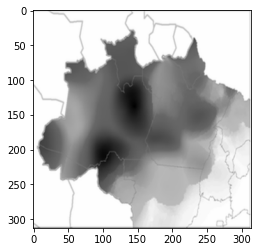

In [ ]:
original = Image.fromarray(r.get_image(1))
plt.imshow(original)
plt.show()

In [ ]:
#regressor=r.predict_with_random_subspace(r.imagesX[0:8])
#regressor=r.predict_with_single_tree()
#regressor=r.predict_with_logistic()

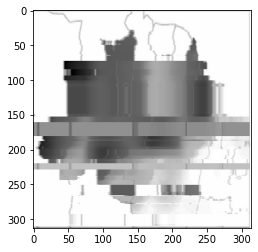

Finalizado


In [ ]:
transformar_imagem(f)

In [ ]:
print('MEA:', metrics.mean_absolute_error(f,r.imagesX[8]))

MEA: 17.09015660770243


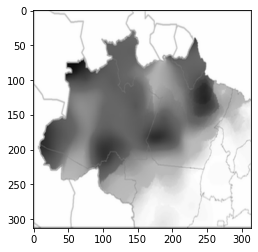

Finalizado


In [ ]:
transformar_imagem(r.imagesX[8])

##Prevendo uma

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
tree=RegressionTree(r.N,r.size)
images= tree.create_image_data_set(r.N,tree.size,link)
len(images)


Imagens carregadas


15

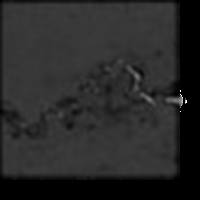

In [ ]:
pngs=[]
for i in range(len(images)):
    new_p = Image.fromarray(images[i])
    if new_p.mode != 'RGB':
      new_p = new_p.convert('RGB')
    pngs.append(new_p)
pngs[7]

In [ ]:
data=pd.DataFrame(pngs,columns=["images"])
data.index.name="id_imagens"
data

In [ ]:
x=data["images"][0:13]
y=data["images"][14]

In [ ]:
def prever(treino,teste):
        regressor = BaggingRegressor(random_state=42, n_estimators=200, bootstrap_features=True)
        for i in range(0,len(treino)-1):
            #print("fitting imagem:",1)
            #transformar_imagem(treino[i])
            #print("fitting imagem:",2)
            #transformar_imagem(treino[i+1])
            regressor.fit(treino[i],treino[i+1])
            print("Fit {} completed".format(i+1))
        return regressor.predict(teste),regressor

In [ ]:
#treino com 5 imagens e testando com a 6
treino=images[0:12]
teste=images[12]
previsto,regressor=prever(treino,teste)

Fit 1 completed
Fit 2 completed
Fit 3 completed
Fit 4 completed
Fit 5 completed
Fit 6 completed
Fit 7 completed
Fit 8 completed
Fit 9 completed
Fit 10 completed
Fit 11 completed


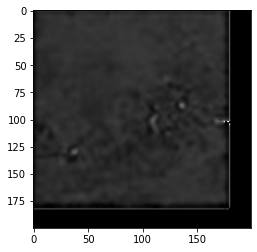

Finalizado


In [ ]:
transformar_imagem(teste)

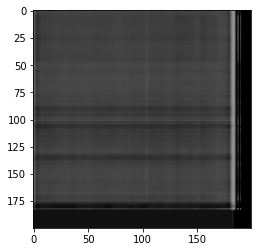

Finalizado


In [ ]:
transformar_imagem(previsto)

In [ ]:
#treinando com 6 imagens e testando com a 7
regressor.fit(images[4],images[5])
sexta=regressor.predict(images[6])

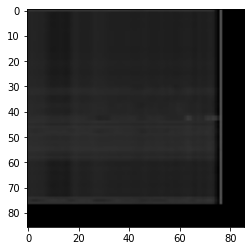

Finalizado


In [ ]:
transformar_imagem(sexta)

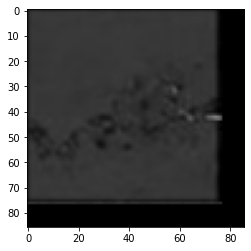

Finalizado


In [ ]:
transformar_imagem(images[6])

In [ ]:
regressor.score(teste,previsto)

1.0

In [ ]:
#com 7 imagens e a oitava de verificação
treino=images[0:6]
teste=images[7]
previsto,regressor=prever(treino,teste)

Fit 1 completed
Fit 2 completed
Fit 3 completed
Fit 4 completed
Fit 5 completed


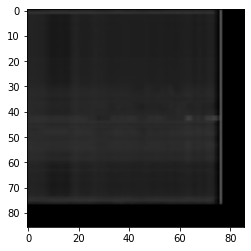

Finalizado


In [ ]:
transformar_imagem(previsto)

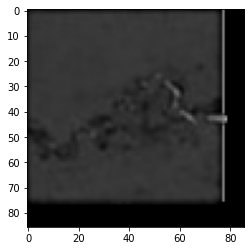

Finalizado


In [ ]:
transformar_imagem(teste)

In [ ]:
regressor.score(images[14],previsto)

0.8131370550640085

#LSMT regression

##Preprocessando o dataset

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
#link="https://raw.githubusercontent.com/moraisnetocc/reg-covid/master/natal.csv"
link="https://raw.githubusercontent.com/moraisnetocc/reg-covid/master/natal.csv"
natal=pd.read_csv(link,index_col=[],usecols=[1], engine='python', na_values=['(NA)']).fillna(0)
natal=(natal.values).astype('float32')
natal

##normalizando o df e separando treino e teste.

In [ ]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaler_natal=scaler.fit_transform(natal)

In [ ]:
tamanho=len(scaler_natal)
precisao=0.90
s=int(tamanho*precisao)
treino,teste=s,tamanho-s
treino_natal,teste_natal=scaler_natal[0:treino,:],scaler_natal[teste:tamanho,:]

In [ ]:
#treino dataset
treino_natal.shape

(36, 1)

In [ ]:
#treino dataset
teste_natal.shape

(36, 1)

#Linear regressão

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x=data[0:3]
y=data[3:6]

In [ ]:
x.shape

(3, 120, 120)

In [ ]:
y.shape

(3, 120, 120)

In [ ]:
shape=x.shape
c=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
c.shape

(3, 14400)

In [ ]:
d=y.reshape(y.shape[0],y.shape[1]*y.shape[2])
d.shape

(3, 14400)

In [ ]:
reg = LinearRegression().fit(c,d)


In [ ]:
r=reg.predict(data[6].reshape(1,-1))

In [ ]:
o=reg.predict(data[7].reshape(1,-1))

In [ ]:
oito=reg.predict(data[8].reshape(1,-1))

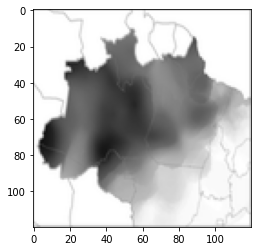

Finalizado


In [ ]:
transformar_imagem(r.reshape(120,120))

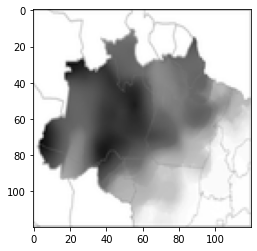

Finalizado


In [ ]:
transformar_imagem(o.reshape(120,120))

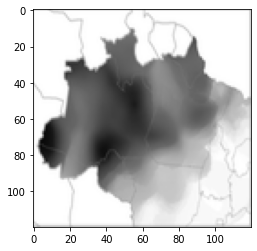

Finalizado


In [ ]:
transformar_imagem(oito.reshape(120,120))

#Tumor teste

In [ ]:
link="https://raw.githubusercontent.com/danielicapui/reg-covid/master/tumor/"
r = RegressionTree(50,300)
tipo='jpg'
data=r.create_image_data_set(r.N,r.size,link,tipo)

In [ ]:
data=np.array(data,dtype='float')
data.shape

In [ ]:
usagi=r.predict_with_random_forest()

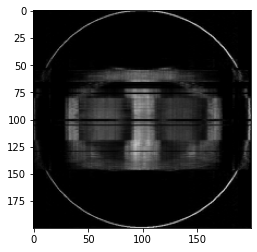

Finalizado


In [ ]:
transformar_imagem(usagi)

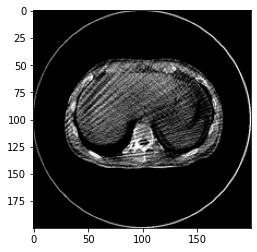

Finalizado


In [ ]:
transformar_imagem(r.imagesX[49])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [ ]:
resultado=r.predict_pixel_to_pixel()

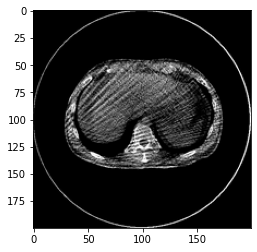

Finalizado


In [ ]:
transformar_imagem(resultado)

In [ ]:
nova_44=r.predict_with_single_tree()

In [ ]:
original_44=r.predict_with_single_tree()

In [ ]:
regressor,n800=r.predict_with_single_tree()

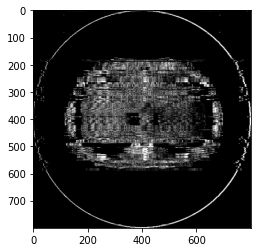

Finalizado


In [ ]:
transformar_imagem(n800)

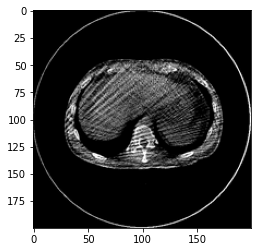

Finalizado


In [ ]:
transformar_imagem(r.imagesX[47])

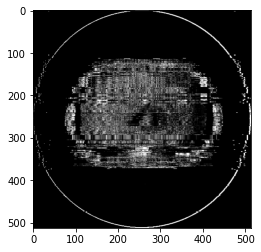

Finalizado


In [ ]:
transformar_imagem(original_44)

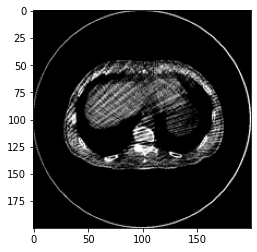

Finalizado


In [ ]:
transformar_imagem(r.imagesX[43])

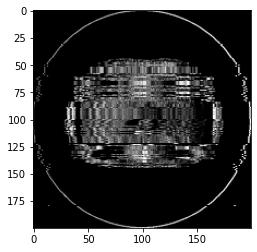

Finalizado


In [ ]:
transformar_imagem(nova_44)

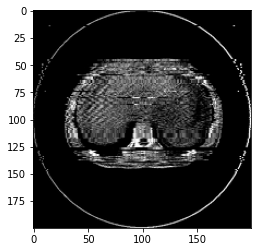

Finalizado


In [ ]:
transformar_imagem(single)

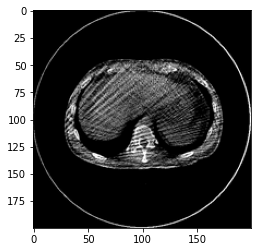

Finalizado


In [ ]:
transformar_imagem(r.imagesX[47])

In [ ]:
for i in range(0,49,4):
  if i==44:
    break
  print(i)

0
4
8
12
16
20
24
28
32
36
40


In [ ]:
logistic=r.predict_with_logistic()
transformar_imagem(logistic)

#Mapa covid test

In [ ]:
#classificador
link="https://raw.githubusercontent.com/danielicapui/reg-covid/master/tumor/"
link="https://raw.githubusercontent.com/danielicapui/reg-covid/master/covid_rn/"
r = RegressionTree(16,300)
tipo='jpg'
data=r.create_image_data_set(r.N,r.size,link,tipo)

Imagens carregadas


In [ ]:
regressor=r.predict_with_random_forest()


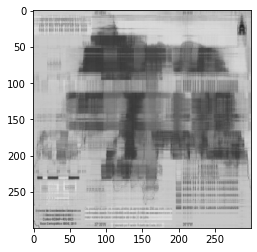

Finalizado


In [ ]:
predicao= regressor.predict(r.imagesX[14])
transformar_imagem(predicao)

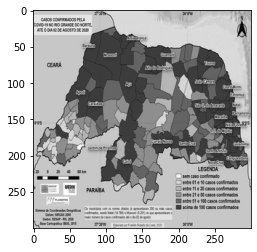

Finalizado


In [ ]:
transformar_imagem(r.imagesX[14])

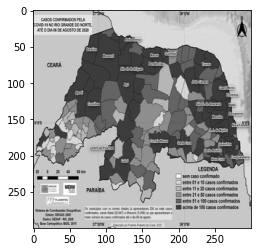

Finalizado


In [ ]:
transformar_imagem(r.imagesX[15])

In [ ]:
pontos=regressor.score(r.imagesX[15],r.imagesX[14])
pontos

0.594488615228607

In [ ]:
pontos=regressor.score(r.imagesX[14],predicao)
pontos

1.0